In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras import optimizers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, Flatten

In [2]:
def load_images(folder):
    
    #empty array that will be used for the value
    Labels = [] 
    Images = []
    label = 0
    
    #looping with i, in list of the folder to find the file
    for i in os.listdir(folder):
        #if the folder was 'hotdog' then the label was given value 1
        if(i=='hotdog'): 
            label = 1
            
        #else the label value was given value 2
        #because i want to use the function for all folder (train, test and val)
        #there would be no exception because train,test and val folder have different directories
        # (not_hotdog for train & test and pizza for the val folder)
        else:
            label = 2
        
        #looping in the image file to find the images
        for img_file in os.listdir(folder+i): 
            
            #read the images with cv2
            # which means folder/(folder+name)/image file
            image = cv2.imread(folder+i+'/'+img_file)
            
            #if the image was null then break, if not resize
            #if there are no 'try except' there will be an error because there were file that None/null
            try:
                #resize all the image into 100x100 (all images must be resized)
                image = cv2.resize(image,(100,100)) 

            except:
                break
            
            #append the image and the label into the variable
            Images.append(image)
            Labels.append(label)
            
    #shuffle the data to get both of type (hotdog and pizza/not_hotdog)
    return shuffle(Images,Labels,random_state=1000) 

define the function for labeling the images

In [3]:
def image_label(labeling):
    #because the data in folder not_hotdog was all pizzas images
    # so i put the labels into pizza 
    labels = {2:'pizza', 1:'hotdog'}
    return labels[labeling]

In [4]:
#train the data
images, labels = load_images('hotdog_dataset/train/') 
#convert the images and the labels into array
images = np.array(images) 
labels = np.array(labels)

verify the images and labels shape

In [5]:
print(images.shape)
print(labels.shape)

(73, 100, 100, 3)
(73,)


print the images and verify its the correct image with the correct label

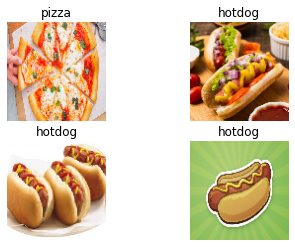

In [6]:
#use random library to get random integer
from random import randint 

#set the size of the subplots
display, img = plt.subplots(2,2) 

#loop to get the random image of hotdogs and pizzas
for i in range(0,2):
    for j in range(0,2):
        
        #set the axis to off, to set off the grid
        img[i,j].axis('off')
        
        #set random integers to display the data randomly
        random = randint(0,len(images))
        
        #set title into name of the label
        img[i,j].set_title(image_label(labels[random]))
        
        #convert the color to RGB because cv2 read the image in BGR
        img[i,j].imshow(cv2.cvtColor(images[random], cv2.COLOR_BGR2RGB))

creating a CNN model

In [7]:
import tensorflow.keras.models as Model
import tensorflow.keras.layers as Layer
model = Model.Sequential()

#the input of a CNN take shape tensors which (img height, img width, color)
#because i resize the image into 100 x 100 and train data have the input shapes of 100,100,3
#then set the input set into 100,100,3
model.add(Layer.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))

#set the max pooling 2D into 2x2
model.add(Layer.MaxPooling2D((2, 2)))

#set the conv2D into 64,(3,3)
model.add(Layer.Conv2D(64, (3, 3), activation='relu'))

#set the max pooling 2D into 2x2
model.add(Layer.MaxPooling2D((2, 2)))

#set the conv2D into 64,(3,3)
model.add(Layer.Conv2D(64, (3, 3), activation='relu'))

#flatten the model because next stage are gonna be adding dense layer
model.add(Layer.Flatten())

#add dense layer on top,
#feed the last output into dense layer to perform classification
model.add(Layer.Dense(64, activation='relu'))
model.add(Layer.Dense(10))

#compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#displaying the architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [8]:
#load the test data to use for the validation
testX, testY = load_images('hotdog_dataset/test/')
testX = np.array(testX)
testY = np.array(testY)
#see the shape of the test data
print(testX.shape)
print(testY.shape)

(33, 100, 100, 3)
(33,)


train and fit the model using the train data

In [9]:
#no need to declare trainX trainY again (train images & train labels) 
# because i declare the images and the labels using the train data at first
# set the validation data into the test data
train_model = model.fit(images, labels, epochs=7, validation_data=(testX, testY))

Epoch 1/7
3/3 [==============================] - 1s 207ms/step - loss: 65.8454 - accuracy: 0.3973 - val_loss: 128.1992 - val_accuracy: 0.4848
Epoch 2/7
3/3 [==============================] - 0s 130ms/step - loss: 90.0360 - accuracy: 0.2603 - val_loss: 79.4845 - val_accuracy: 0.5152
Epoch 3/7
3/3 [==============================] - 0s 133ms/step - loss: 27.3848 - accuracy: 0.8219 - val_loss: 8.3443 - val_accuracy: 0.5152
Epoch 4/7
3/3 [==============================] - 0s 127ms/step - loss: 4.5571 - accuracy: 0.5616 - val_loss: 4.6877 - val_accuracy: 0.5152
Epoch 5/7
3/3 [==============================] - 0s 122ms/step - loss: 0.8164 - accuracy: 0.8356 - val_loss: 4.3183 - val_accuracy: 0.5152
Epoch 6/7
3/3 [==============================] - 0s 121ms/step - loss: 0.2940 - accuracy: 0.9041 - val_loss: 0.9755 - val_accuracy: 0.6970
Epoch 7/7
3/3 [==============================] - 0s 121ms/step - loss: 0.3317 - accuracy: 0.8904 - val_loss: 4.1856 - val_accuracy: 0.5152


In [10]:
predictX, predictY = load_images('hotdog_dataset/val/')
predictX = np.array(predictX)
predictY = np.array(predictY)
print(predictX.shape)
print(predictY.shape)

(32, 100, 100, 3)
(32,)


validate the data

In [12]:
validation_model = model.fit(images, labels, epochs=5, validation_data=(predictX, predictY))

Epoch 1/5
3/3 [==============================] - 0s 141ms/step - loss: 3.4560e-04 - accuracy: 1.0000 - val_loss: 1.8983 - val_accuracy: 0.5938
Epoch 2/5
3/3 [==============================] - 0s 120ms/step - loss: 2.8998e-04 - accuracy: 1.0000 - val_loss: 1.7555 - val_accuracy: 0.6562
Epoch 3/5
3/3 [==============================] - 0s 122ms/step - loss: 2.3941e-04 - accuracy: 1.0000 - val_loss: 1.9041 - val_accuracy: 0.6250
Epoch 4/5
3/3 [==============================] - 0s 129ms/step - loss: 9.7984e-05 - accuracy: 1.0000 - val_loss: 2.1668 - val_accuracy: 0.5938
Epoch 5/5
3/3 [==============================] - 0s 119ms/step - loss: 3.4919e-05 - accuracy: 1.0000 - val_loss: 2.4477 - val_accuracy: 0.5625


References :

https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras/

https://blog.usejournal.com/convolutional-neural-networks-why-what-and-how-f8f6dbebb2f9

https://www.tensorflow.org/tutorials/images/cnn

https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb
